# Data Cleaning

### Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

dataset = "train"
df = pd.read_excel('Data/'+dataset+'.xlsx')

print("Number of records: ", len(df))

Number of records:  2000


### Taking a look at the data

In [2]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [3]:
df.info()
# We notice that all features are of the numerical type, which will facilitate dealing with them
# We also notice that number of nulls is so small

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Hadnling Nulls

<Axes: >

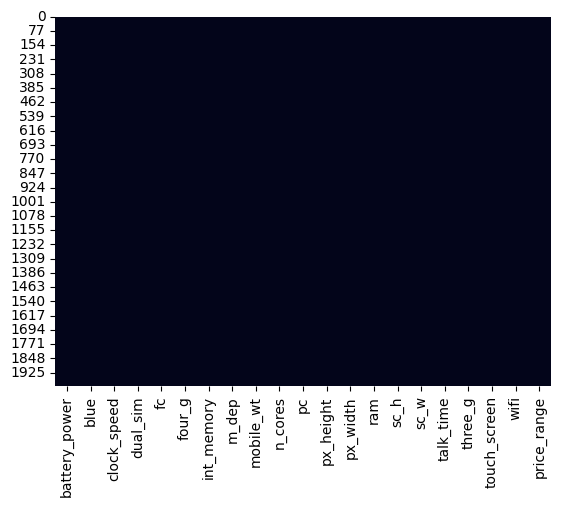

In [4]:
sns.heatmap(df.isnull(), cbar = False)
# Data almost has no missing values

In [5]:
print("Total number of nulls: ", df.isnull().sum().sum())
print("Nulls per column: ")
print(df.isnull().sum())
# The biggest number of missing values in a feature is 5 

Total number of nulls:  43
Nulls per column: 
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


Since number of nulls is minimal, we can safely drop them

In [6]:
# Drop nulls
df = df.dropna()
print("Number of records after dropping nulls: ", len(df))

Number of records after dropping nulls:  1991


### Handling Duplicates

In [7]:
# Checking for duplicates
df.duplicated().sum()
# No duplicates found

0

### Preprocessing

Heatmap

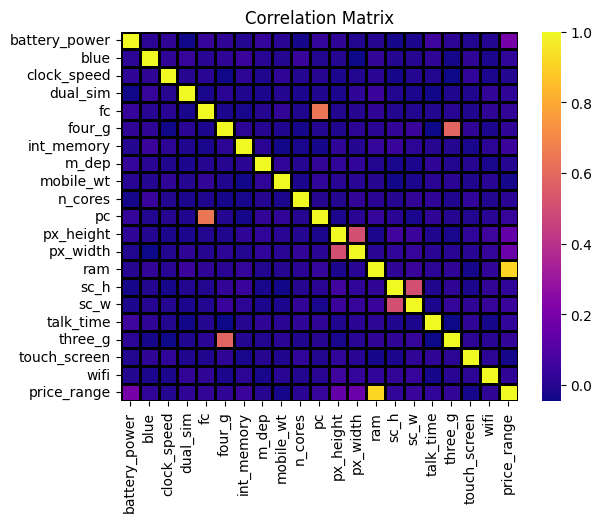

In [8]:
sns.heatmap(df.corr(), cbar = True, linewidths=1, linecolor='black', cmap='plasma')
# sns.heatmap(df.corr(), annot= False, cmap='jet')
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Get the ranges of the features
df.describe()
# We notice that the features have different ranges, which will require normalization


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,...,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,1238.270718,0.496233,1.522451,0.510799,4.307885,0.520844,32.074335,0.502009,140.263184,4.516323,...,644.800603,1251.115520,2123.632848,12.307885,5.774485,11.001507,0.760924,0.501758,0.505274,1.499247
std,439.641057,0.500111,0.815499,0.500009,4.339735,0.499691,18.138177,0.288622,35.398777,2.291257,...,442.951035,431.924893,1085.051293,4.213061,4.357385,5.464872,0.426626,0.500123,0.500098,1.118539
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.500000,875.500000,1207.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1615.500000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.500000,1633.000000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Normalization

In [22]:
# Normalizing the data (Except the target - price_range)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
df.head()       # Checking the data after normalization

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0,0.68,0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0,0,1,1
1,0.347361,1,0.00,1,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1,1,0,2
2,0.041416,1,0.00,1,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1,1,0,2
3,0.076152,1,0.80,0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1,0,0,2
4,0.881764,1,0.28,0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1,1,0,1


In [24]:
# Checking the distribution of the target
df.value_counts('price_range')
# It is a balanced dataset

price_range
0    499
2    499
3    497
1    496
Name: count, dtype: int64

### Saving the data

In [25]:
df.to_excel('Data/Cleaned_'+dataset+'.xlsx', index=False)